<a href="https://colab.research.google.com/github/bpazos97/StrokePrediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Prevention**

A stroke, sometimes called a brain attack, occurs when something blocks the blood supply to a part of the brain or when a blood vessel in the brain bursts. In either case, parts of the brain are damaged or die. A stroke can cause lasting brain damage, long-term disability, or even death.

In Argentina:



*   A stroke occurs every nine minutes.
*   There are 126,000 cases of stroke per year, of which 18,000 result in death.


In the United States:

*   Someone experiences a stroke every 40 seconds.
*   Every 4 minutes, a person dies from a stroke.
*   The costs related to stroke amounted to nearly $46 billion between 2014 and 2015. This total includes the cost of healthcare services, medications for stroke treatment, and lost workdays.


According to the WHO, 80% of strokes are preventable.

The objective of this work is to build a prediction model to predict stroke and evaluate the accuracy of the model. We will explore five different models to see which one produces reliable and repeatable results. The models are Decision Tree, Random Forest, SVM, Logistic Regression, KNN and XGBoost. Based on the prediction results of the models, the best-performing model will undergo cross-validation to assess its repeatability.

We aim for the model to provide added value to doctors, clinics, insurers, and companies (in pre-employment and periodic exams) by saving them future expenses.

Regarding metrics, we will consider Recall as the most important one since we aim to have the fewest false negatives possible for ethical reasons, followed by Precision, which is the measure that will generate value for our model.

The dataset used was downloaded from the Kaggle website. The person who uploaded it kept the source anonymous.

## **Loading data and packages**

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, classification_report, auc, average_precision_score, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits import mplot3d
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [73]:
acv=pd.read_csv("/content/healthcare-dataset-stroke-data.csv", delimiter=",")
acv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.00,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.00,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35.00,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51.00,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


## **Dataset information**

In [74]:
acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [75]:
categorical_columns = acv.select_dtypes(include='object').columns
column_values = {column: set(acv[column]) for column in categorical_columns}
print(column_values)

{'gender': {'Female', 'Other', 'Male'}, 'ever_married': {'No', 'Yes'}, 'work_type': {'Never_worked', 'children', 'Govt_job', 'Self-employed', 'Private'}, 'Residence_type': {'Rural', 'Urban'}, 'smoking_status': {'never smoked', 'smokes', 'Unknown', 'formerly smoked'}}


In [76]:
acv.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00



**Description of the variables**

id: Individual identification number. Integer

gender: Gender of the individual. String

hypertension: Indicates whether the patient has hypertension or not. Integer (1, 0)

heart_disease: Indicates whether the patient has heart disease or not. Integer (1, 0)

ever_married: Indicates whether the patient is married or not. String (Yes, No)

work_type: Different categories of work. String (children, Govt_job, Never_worked, Private, Self-employed)

Residence_type: Type of residence of the individual. String (Urban, Rural)

avg_glucose_level: Average glucose level in the individual's blood. Float

bmi: Body Mass Index. Float

smoking_status: Smoking status of the individual. String (formerly smoked, never smoked, smokes, unknown)

stroke: Target variable. Indicates whether the patient had a stroke or not.

<Axes: >

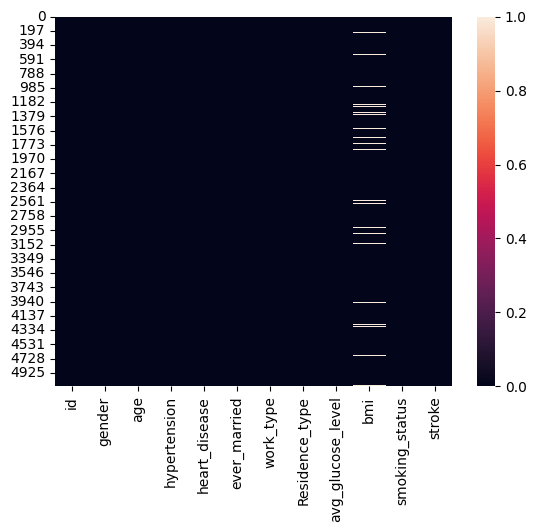

In [77]:
sns.heatmap(acv.isnull())

In [78]:
missing_values = acv.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)
print(acv.shape)

bmi    201
dtype: int64
(5110, 12)


In [79]:
strokes=acv[acv.stroke == 1]
nostrokes=acv[acv.stroke == 0]

For the missing values of bmi, we replace the bmi with the average according to whether the patient had a stroke or not.

In [80]:
acv[acv['bmi'].isnull() & acv.stroke == 1]=acv[acv['bmi'].isnull() & acv.stroke == 1].fillna(np.mean(strokes.bmi))
acv[acv['bmi'].isnull() & acv.stroke == 0]=acv[acv['bmi'].isnull() & acv.stroke == 0].fillna(np.mean(nostrokes.bmi))


The id column does not provide any useful information. We will remove it.

In [81]:
acv = acv.drop("id", 1)

In [82]:
acv.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

It's just a single value. We remove it.

In [83]:
acv = acv[acv.gender != 'Other']

In [84]:
acv.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

The "Unknown" values represent nearly 30% of the dataset. We will consider them as a fourth category.

## **Exploratory Data Analysis**

In [85]:
categoricas={"gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"}
continuas={"age", "avg_glucose_level", "bmi"}

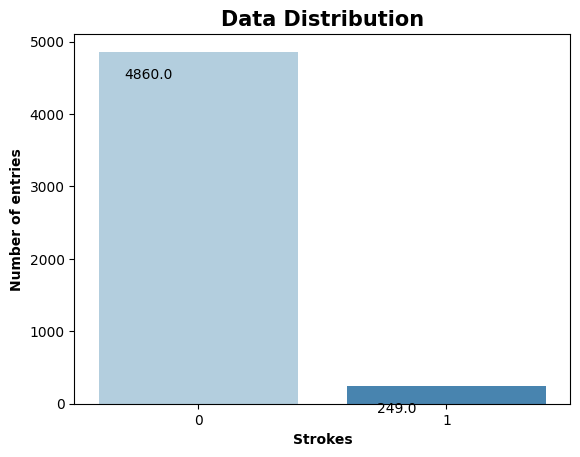

In [86]:
sns.countplot(x=acv.stroke, palette='Blues')
plt.xlabel('Strokes', fontsize=10, fontweight='bold')
plt.ylabel('Number of entries', fontsize=10, fontweight='bold')
plt.title('Data Distribution', fontweight='bold', fontsize='15')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.show()

In [87]:
acv.stroke.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

We are facing a classification problem with highly imbalanced data regarding the target variable.

In [88]:
strokes=acv[acv.stroke == 1]

<Axes: xlabel='age', ylabel='Density'>

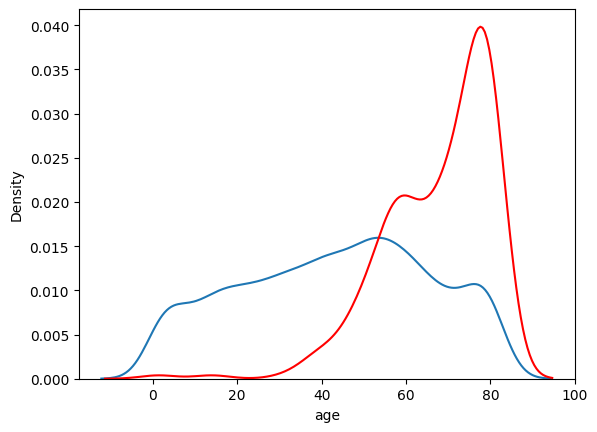

In [89]:
from seaborn import distplot
distplot(acv.age, hist=False)
distplot(strokes.age, hist=False, color= "Red", label="Stroke")

We can observe that as age increases, the number of strokes significantly increases.

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

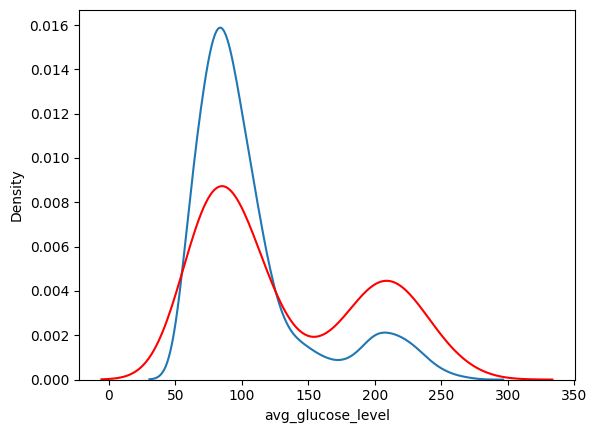

In [90]:
distplot(acv.avg_glucose_level, hist=False)
distplot(strokes.avg_glucose_level, hist=False, color= "Red")

The shape of the distributions is similar between the cases of strokes and the population regarding average glucose level. We can see that there are more stroke cases than the population when it is around 200, but the majority of cases are around 75, which are also the most repeated values in the population.

<Axes: xlabel='bmi', ylabel='Density'>

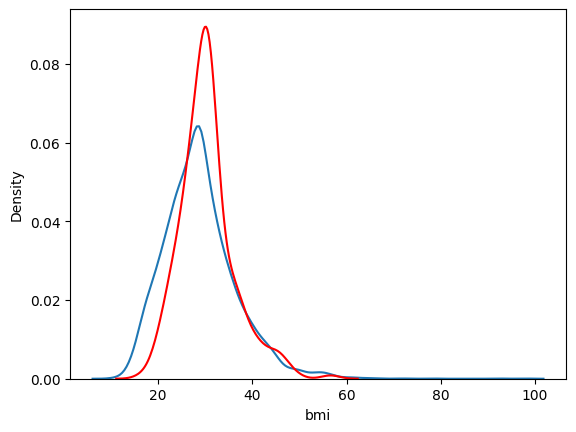

In [91]:
distplot(acv.bmi, hist=False)
distplot(strokes.bmi, hist=False, color= "Red")

The BMI (Body Mass Index) of the population and the cases of strokes follow similar distributions in shape. We can see that the majority of stroke cases occur around 30, which is also the most repeated value in the population.

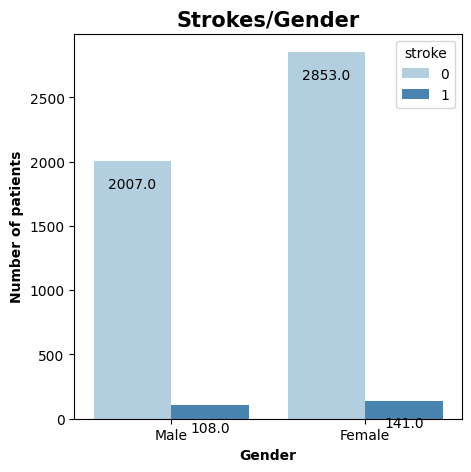

In [92]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(x='gender', hue='stroke', data=acv, palette='Blues')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)

plt.xlabel('Gender', fontsize=10, fontweight='bold')
plt.ylabel('Number of patients', fontsize=10, fontweight='bold')
plt.title('Strokes/Gender', fontweight='bold', fontsize=15)

plt.show()



Among men (41% of the dataset), 5% have experienced a stroke.

Among women (59% of the dataset), 4% have experienced a stroke.

There isn't much difference in terms of gender and the likelihood of experiencing a stroke.

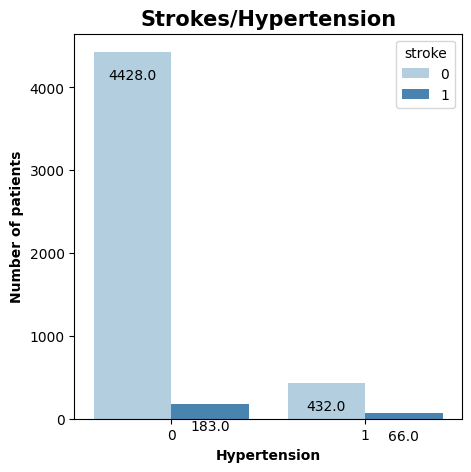

In [93]:
fig5, ax=plt.subplots(figsize=(5,5))
legend1 = ['Sin ACV', 'ACV']
sns.countplot(x=acv.hypertension,hue=acv.stroke, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Hypertension', fontsize=10, fontweight='bold')
plt.ylabel('Number of patients', fontsize=10, fontweight='bold')
plt.title('Strokes/Hypertension', fontweight = 'bold', fontsize='15')
plt.show()

Among the cases with hypertension (10% of the dataset), 14% have experienced a stroke.

Among the cases without hypertension (90% of the dataset), 4% have experienced a stroke.

Having hypertension seems to increase the likelihood of having a stroke compared to not having it.

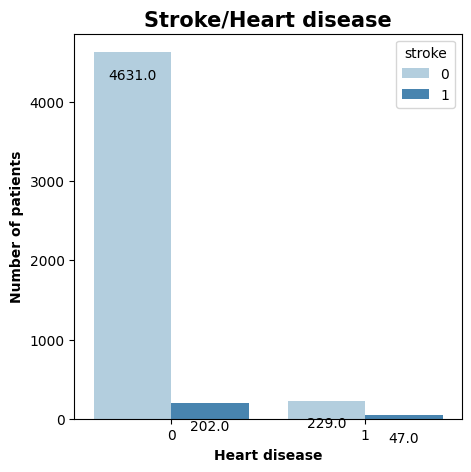

In [94]:
fig5, ax=plt.subplots(figsize=(5,5))
legend1 = ['Sin ACV', 'ACV']
sns.countplot(x=acv.heart_disease,hue=acv.stroke, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Heart disease', fontsize=10, fontweight='bold')
plt.ylabel('Number of patients', fontsize=10, fontweight='bold')
plt.title('Stroke/Heart disease', fontweight = 'bold', fontsize='15')
plt.show()

Among the cases with heart disease (5% of the dataset), 17% have experienced a stroke.

Among the cases without heart disease (95% of the dataset), 4% have experienced a stroke.

Having a heart disease seems to increase the likelihood of having a stroke compared to not having it.

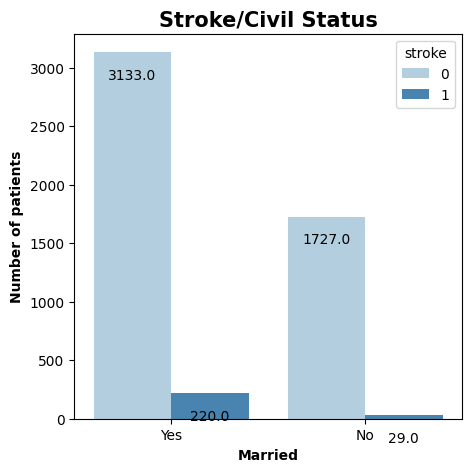

In [95]:
fig5, ax=plt.subplots(figsize=(5,5))
legend1 = ['Sin ACV', 'ACV']
sns.countplot(x=acv.ever_married,hue=acv.stroke, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Married', fontsize=10, fontweight='bold')
plt.ylabel('Number of patients', fontsize=10, fontweight='bold')
plt.title('Stroke/Civil Status', fontweight = 'bold', fontsize='15')
plt.show()

Among the unmarried individuals (34% of the dataset), 2% have experienced a stroke.

Among the married individuals (66% of the dataset), 6% have experienced a stroke.

Being married seems to increase the likelihood of having a stroke compared to being unmarried.

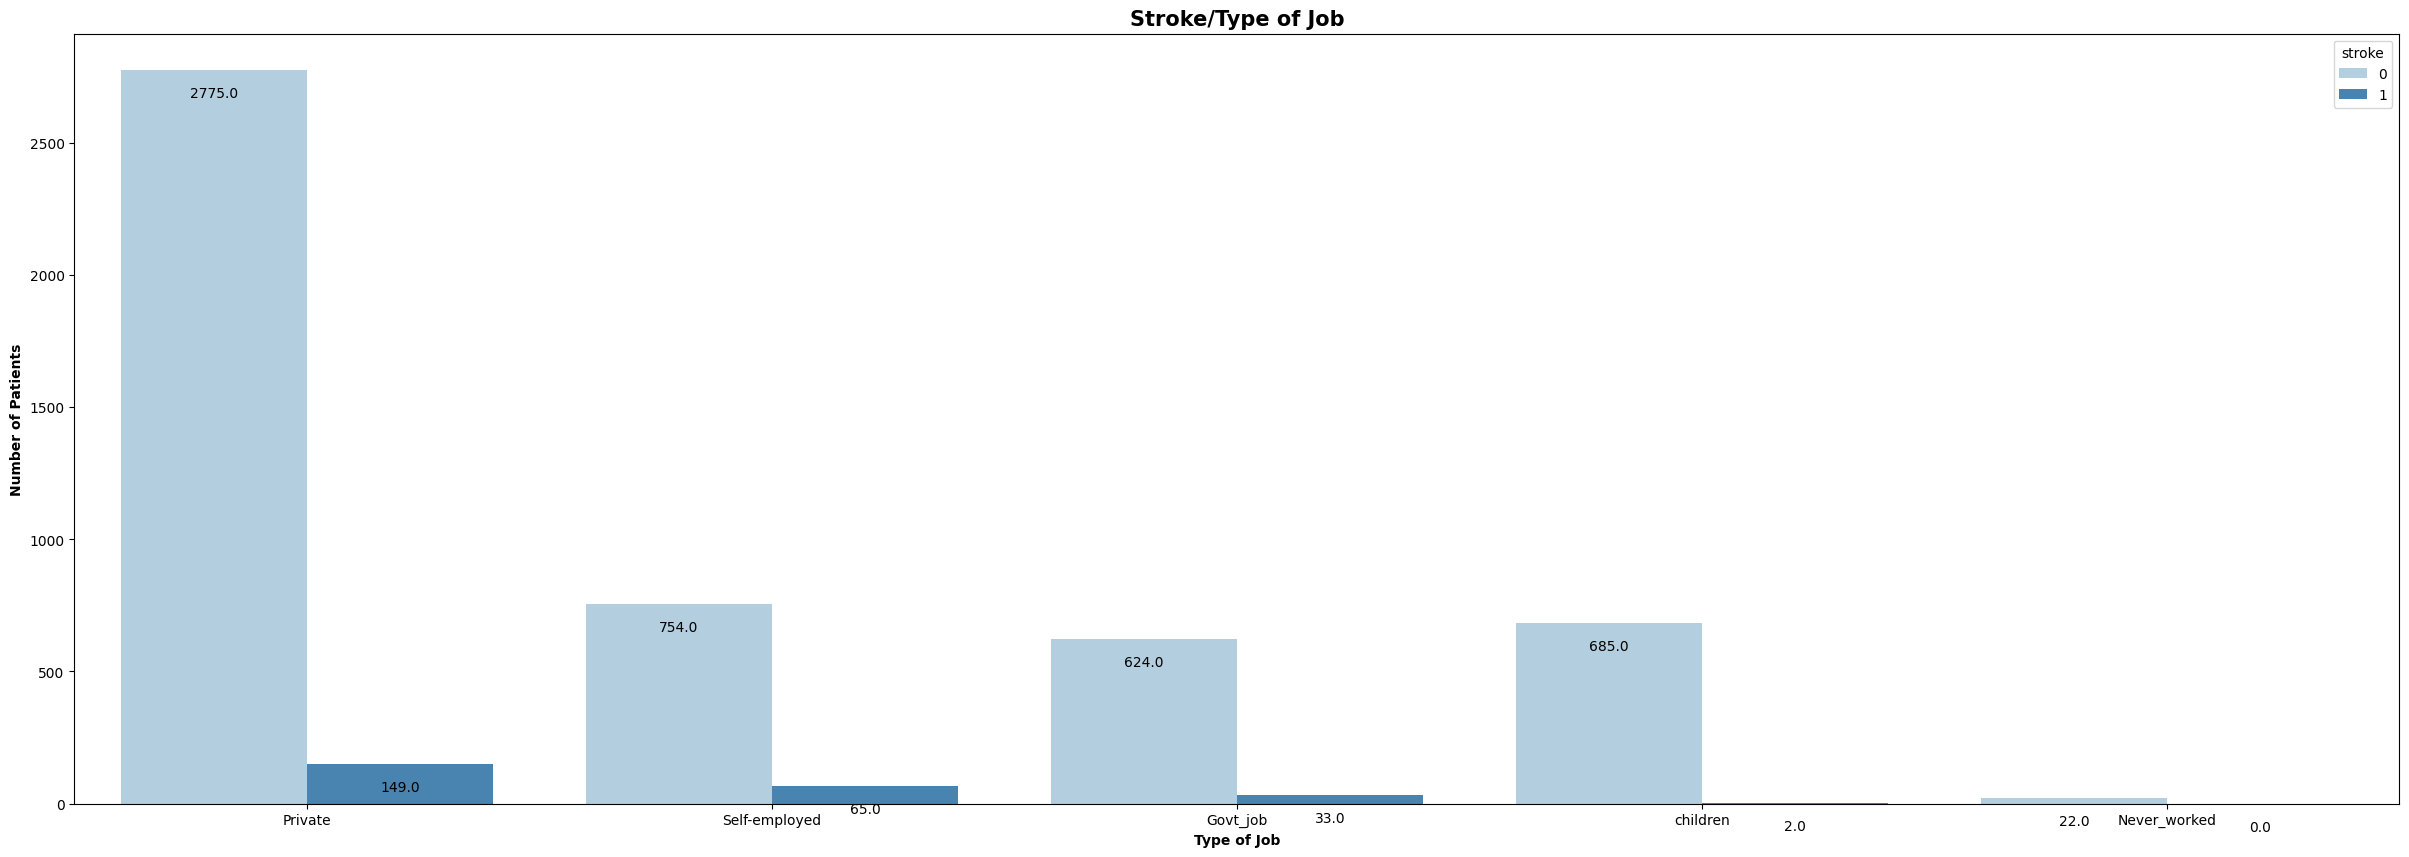

In [96]:
fig5, ax=plt.subplots(figsize=(30,10))
legend1 = ['Sin ACV', 'ACV']
sns.countplot(x=acv.work_type,hue=acv.stroke, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Type of Job', fontsize=10, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=10, fontweight='bold')
plt.title('Stroke/Type of Job', fontweight = 'bold', fontsize='15')
plt.show()

Among individuals working in the private sector (54% of the dataset), 5% have experienced a stroke.

Among self-employed individuals (15% of the dataset), 8% have experienced a stroke.

Among individuals working in the government sector (12% of the dataset), 5% have experienced a stroke.

Among individuals with children (13% of the dataset), less than 1% have experienced a stroke.

Among individuals who have never worked (less than 1% of the dataset), none have experienced a stroke.

Being self-employed appears to be the most risky profession in terms of the likelihood of having a stroke compared to the others.

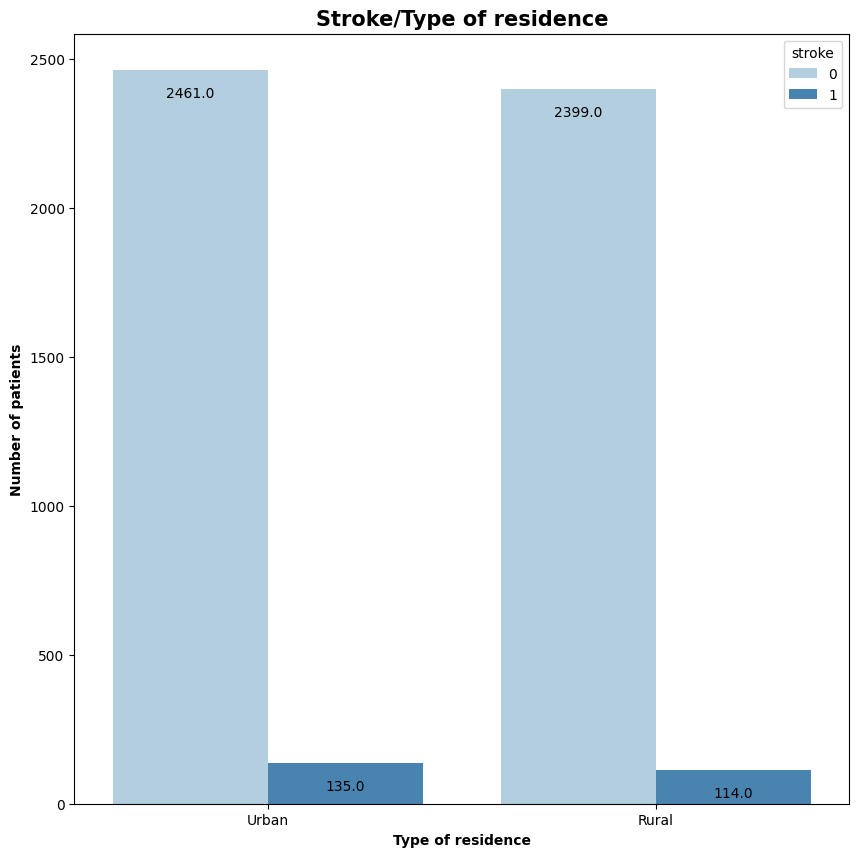

In [97]:
fig5, ax=plt.subplots(figsize=(10,10))
legend1 = ['Sin ACV', 'ACV']
sns.countplot(x=acv.Residence_type,hue=acv.stroke, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Type of residence', fontsize=10, fontweight='bold')
plt.ylabel('Number of patients', fontsize=10, fontweight='bold')
plt.title('Stroke/Type of residence', fontweight = 'bold', fontsize='15')
plt.show()

Among individuals living in urban areas (51% of the dataset), 5% have experienced a stroke.

Among individuals living in rural areas (49% of the dataset), 4% have experienced a stroke.

There is not much difference in terms of the type of residence and the likelihood of having a stroke.

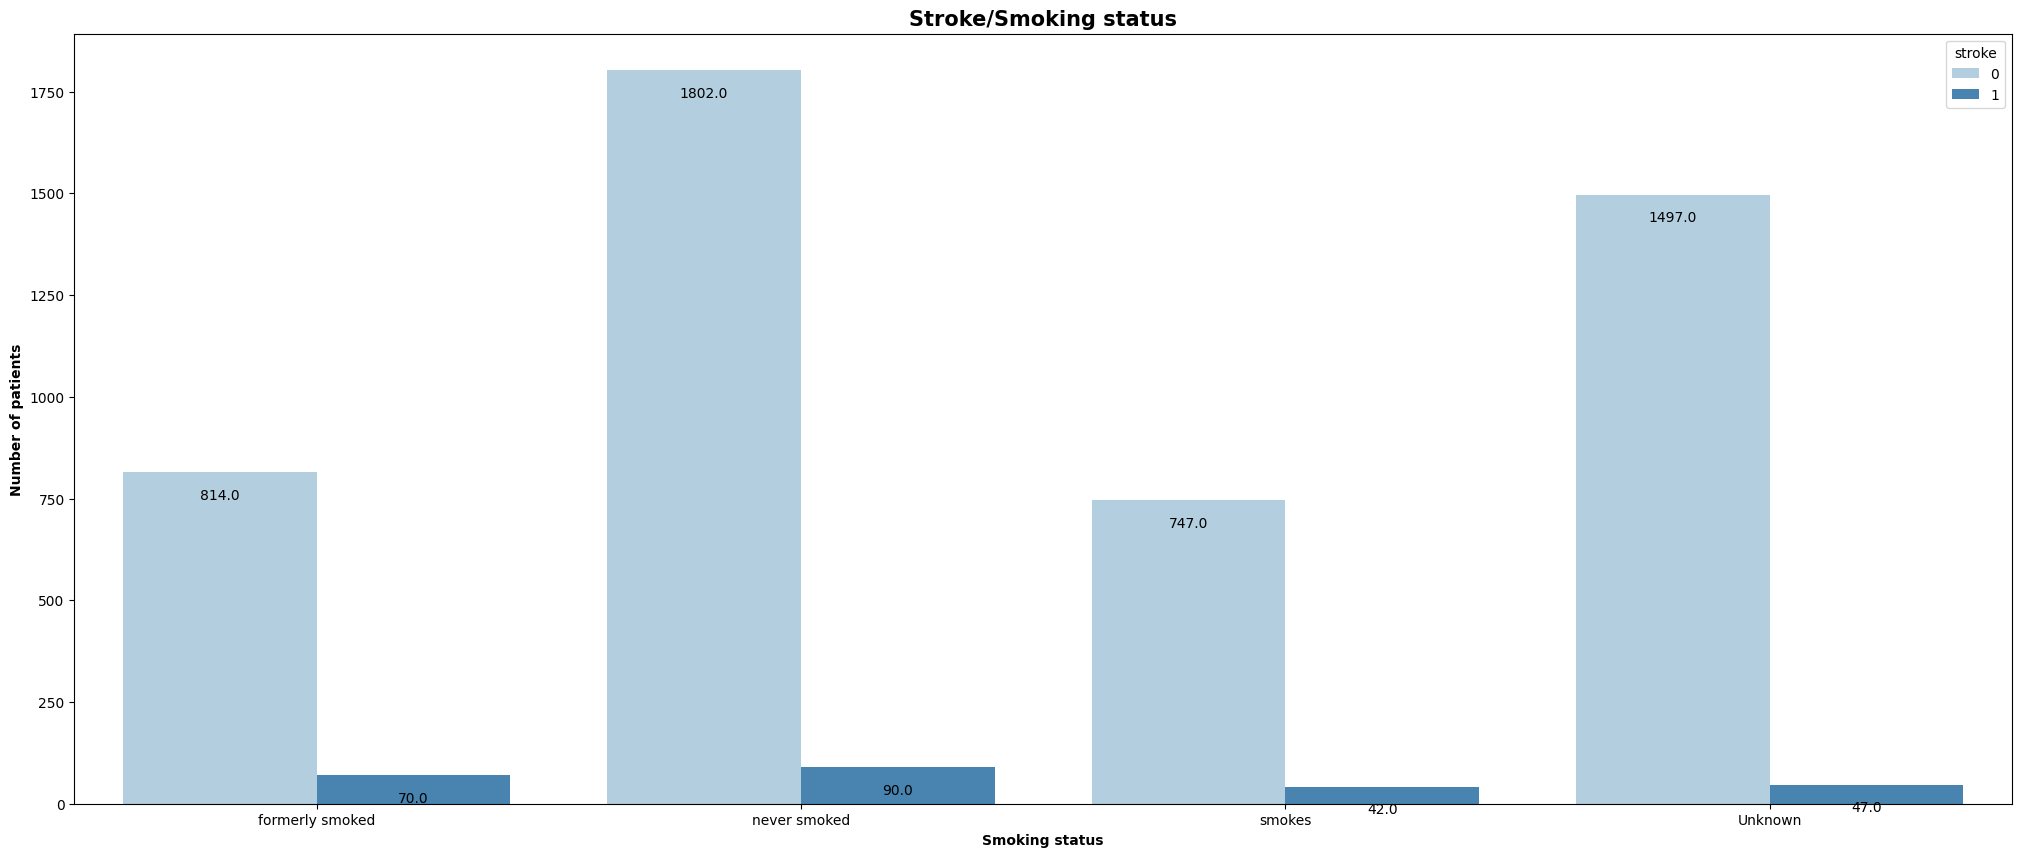

In [98]:
fig5, ax=plt.subplots(figsize=(25,10))
legend1 = ['Sin ACV', 'ACV']
sns.countplot(x=acv.smoking_status,hue=acv.stroke, palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)
plt.xlabel('Smoking status', fontsize=10, fontweight='bold')
plt.ylabel('Number of patients', fontsize=10, fontweight='bold')
plt.title('Stroke/Smoking status', fontweight = 'bold', fontsize='15')
plt.show()

Among individuals who used to smoke (17% of the dataset), 8% have experienced a stroke.

Among individuals who have never smoked (37% of the dataset), 5% have experienced a stroke.

Among individuals who currently smoke (15% of the dataset), 5% have experienced a stroke.

Among individuals with unknown smoking status (30% of the dataset), 3% have experienced a stroke.

It appears that there is no clear influence of smoking status on the likelihood of having a stroke.

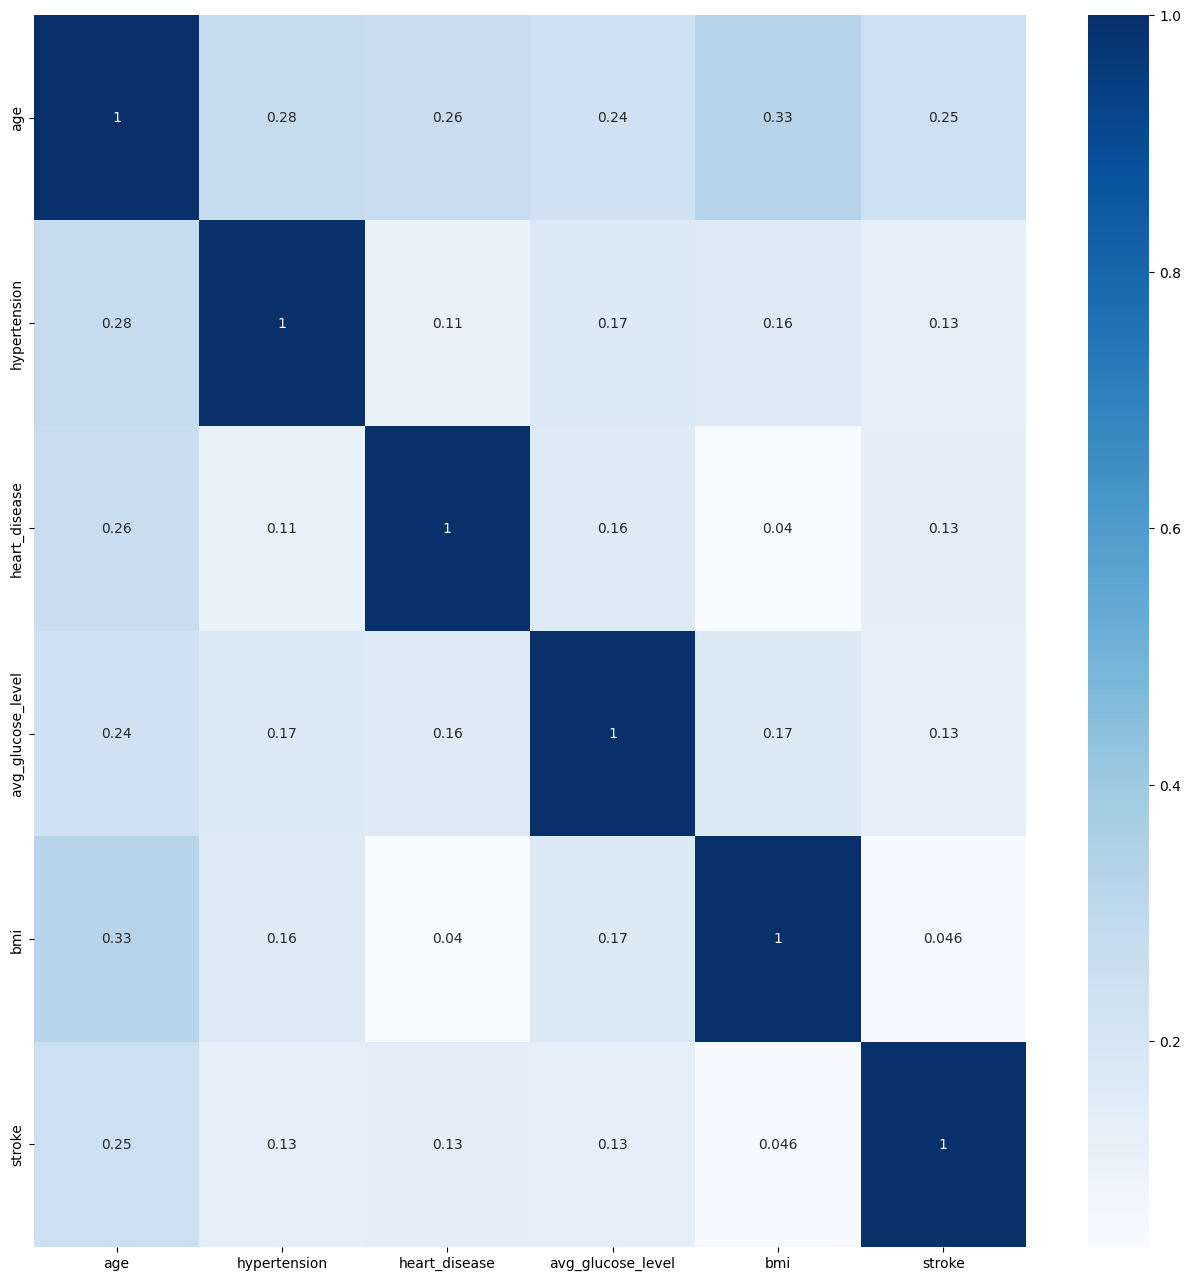

In [99]:
corrmat = acv.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
g=sns.heatmap(acv[top_corr_features].corr(),annot=True,cmap="Blues")
plt.show()

Age and BMI are the variables with the highest correlation. The variable that is most related to the likelihood of having a stroke is age.

In [100]:
strokes["bmi"] = strokes["bmi"].apply(lambda x: 50 if x>50 else x)

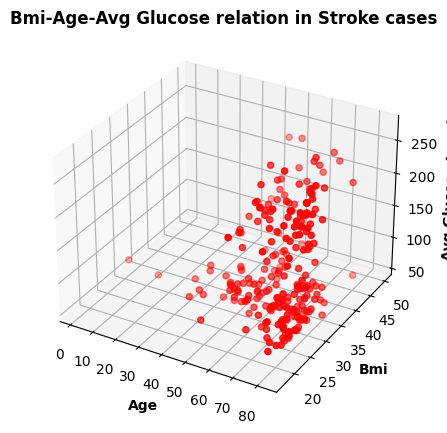

In [101]:
x = strokes["age"]
y = strokes["bmi"]
z = strokes["avg_glucose_level"]

fig = plt.figure(figsize = (5, 5))
ax1 = plt.axes(projection ="3d")


ax1.scatter3D(x, y, z, color = "red")


plt.title("Bmi-Age-Avg Glucose relation in Stroke cases", fontweight= "bold" )

ax1.set_xlabel('Age', fontweight ='bold')
ax1.set_ylabel('Bmi', fontweight ='bold')
ax1.set_zlabel('Avg Glucose Level', fontweight ='bold')

# show plot
plt.show()


We do not observe a pattern among the three variables.

## **Feature Engineering**


We proceed to standardize the numerical variables and encode the categorical variables.

In [102]:
acv["bmi"] = pd.to_numeric(acv["bmi"])
acv["bmi"] = acv["bmi"].apply(lambda x: 50 if x>50 else x)
acv["gender"] = acv["gender"].apply(lambda x: 1 if x=="Male" else 0)
acv["ever_married"] = acv["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)


In [103]:
acv

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.00,0,1,1,Private,Urban,228.69,36.60,formerly smoked,1
1,0,61.00,0,0,1,Self-employed,Rural,202.21,30.47,never smoked,1
2,1,80.00,0,1,1,Private,Rural,105.92,32.50,never smoked,1
3,0,49.00,0,0,1,Private,Urban,171.23,34.40,smokes,1
4,0,79.00,1,0,1,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.00,1,0,1,Private,Urban,83.75,28.82,never smoked,0
5106,0,81.00,0,0,1,Self-employed,Urban,125.20,40.00,never smoked,0
5107,0,35.00,0,0,1,Self-employed,Rural,82.99,30.60,never smoked,0
5108,1,51.00,0,0,1,Private,Rural,166.29,25.60,formerly smoked,0


In [104]:
X = acv.drop(["stroke"], axis=1)

y = acv['stroke']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                             stratify = y, random_state=1)

In [106]:
def add_additional_cols(df):
    df['smokes'] = np.nan
    df['smokes'][df['smoking_status']=='smokes'] = 1
    df['smokes'][df['smoking_status']!='smokes'] = 0
    df['smokes'] = df['smokes'].astype('int')

    df['high_bmi']=np.nan
    df['high_bmi'][df['bmi']>=25] = 1
    df['high_bmi'][df['bmi']<25] = 0

    df['no_of_risk_factors'] = df['hypertension']+df['heart_disease']+df['smokes']+df['high_bmi']

In [107]:
add_additional_cols(X_train)
add_additional_cols(X_test)


In [108]:
y_train_prepro=y_train
X_train_prepro=X_train
X_test_prepro=X_test
X_atributos = acv

In [109]:
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler

num_attribs = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'no_of_risk_factors']
cat_attribs = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


def preprocess_data(X_train, y_train, X_test, num_attribs, cat_attribs):

    num_pipeline = make_pipeline(StandardScaler())
    cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))


    preprocessor = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs)
    ])


    X_train_preprocessed = preprocessor.fit_transform(X_train, y_train)


    X_test_preprocessed = preprocessor.transform(X_test)


    oversampler = RandomOverSampler(sampling_strategy='minority', random_state=1)
    X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_preprocessed, y_train)

    return X_train_oversampled, y_train_oversampled, X_test_preprocessed



X_train_oversampled, y_train_oversampled, X_test_preprocessed = preprocess_data(X_train, y_train, X_test, num_attribs, cat_attribs)


X_test= X_test_preprocessed
X_train = X_train_oversampled
y_train = y_train_oversampled


## **Running models**
Decision tree, Random Forest, KNN, Logistic Regression, SVM and XGBoost

In [110]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def evaluate_models(X_train, y_train, X_test, y_test):
    random_seed = 1
    np.random.seed(random_seed)

    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=random_seed),
        'Random Forest': RandomForestClassifier(random_state=random_seed),
        'KNN': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(random_state=random_seed),
        'SVM': SVC(random_state=random_seed),
        'XGBoost': XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000,random_state=random_seed)
    }

    results_list = []

    for name, model in models.items():
        model.fit(X_train, y_train)

        np.random.seed(random_seed)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        accuracy_train = accuracy_score(y_train, y_train_pred)
        precision_train = precision_score(y_train, y_train_pred)
        recall_train = recall_score(y_train, y_train_pred)
        f1_train = f1_score(y_train, y_train_pred)

        accuracy_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred)
        recall_test = recall_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred)

        results_list.append({
            'Model': name,
            'Accuracy (Train)': accuracy_train,
            'Precision (Train)': precision_train,
            'Recall (Train)': recall_train,
            'F1 Score (Train)': f1_train,
            'Accuracy (Test)': accuracy_test,
            'Precision (Test)': precision_test,
            'Recall (Test)': recall_test,
            'F1 Score (Test)': f1_test
        })

    results = pd.DataFrame(results_list)
    return results


In [111]:
results = evaluate_models(X_train, y_train, X_test, y_test)
results

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,Decision Tree,1.00,1.00,1.00,1.00,0.92,0.13,0.13,0.13
1,Random Forest,1.00,1.00,1.00,1.00,0.94,0.08,0.02,0.03
2,KNN,0.96,0.92,1.00,0.96,0.83,0.08,0.23,0.11
3,Logistic Regression,0.78,0.76,0.82,0.79,0.74,0.13,0.76,0.22
4,SVM,0.88,0.82,0.95,0.88,0.75,0.10,0.50,0.16
5,XGBoost,0.90,0.85,0.96,0.90,0.80,0.14,0.65,0.23


We are facing overfitting in all 5 models. XGBoost seem to be the best overall performer followed by Logistic Regression
Given that this is a medical context, our primary emphasis should be on maximizing recall. It is crucial to detect as many high-risk cases as we can, even if it means sacrificing precision. We will work on F1 to get the most robust model possible.
I will choose to tune hyperparameters for XGBoost, Logistic Regression as this last one had the highest recall.

## **Hyperparameter Tunning XGBoost and Logistic Regression**

### **Hyperparameter Tunning XGBoost**

In [112]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000,random_state=1)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search = GridSearchCV(xgb, param_grid=param_grid, scoring='f1', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_modelXG = grid_search.best_estimator_
best_paramsXG = grid_search.best_params_

y_train_pred = best_modelXG.predict(X_train)
y_test_pred = best_modelXG.predict(X_test)

resultadoshypXG = pd.DataFrame({
    'Accuracy (Train)': [accuracy_score(y_train, y_train_pred)],
    'Precision (Train)': [precision_score(y_train, y_train_pred)],
    'Recall (Train)': [recall_score(y_train, y_train_pred)],
    'F1 Score (Train)': [f1_score(y_train, y_train_pred)],
    'Accuracy (Test)': [accuracy_score(y_test, y_test_pred)],
    'Precision (Test)': [precision_score(y_test, y_test_pred)],
    'Recall (Test)': [recall_score(y_test, y_test_pred)],
    'F1 Score (Test)': [f1_score(y_test, y_test_pred)]
})


In [113]:
resultadoshypXG

,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,1.00,1.00,1.00,1.00,0.95,0.41,0.21,0.28


### **Hyperparameter Tunning Logistic Regression**

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

logreg = LogisticRegression(random_state=1)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}

f1_scorer = make_scorer(f1_score, greater_is_better=True, needs_threshold=True)

grid_search = GridSearchCV(logreg, param_grid=param_grid, scoring=f1_scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_modelLR = grid_search.best_estimator_
best_paramsLR = grid_search.best_params_

y_pred_proba = best_modelLR.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0, 1, 100)

best_f1 = 0.0
best_threshold = 0.0

for threshold in thresholds:
    y_pred = (y_pred_proba > threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

best_modelLR.threshold = best_threshold

y_pred = (y_pred_proba > best_threshold).astype(int)

accuracy_train = accuracy_score(y_train, y_train)
precision_train = precision_score(y_train, y_train)
recall_train = recall_score(y_train, y_train)
f1_train = f1_score(y_train, y_train)

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

results_list = []

results_list.append({
    'Accuracy (Train)': accuracy_train,
    'Precision (Train)': precision_train,
    'Recall (Train)': recall_train,
    'F1 Score (Train)': f1_train,
    'Accuracy (Test)': accuracy_test,
    'Precision (Test)': precision_test,
    'Recall (Test)': recall_test,
    'F1 Score (Test)': f1_test,
    'Best F1 Score (Test)': best_f1,
    'Best Threshold': best_threshold
})

resultadoshypLogReg = pd.DataFrame(results_list)



In [115]:
resultadoshypLogReg

,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test),Best F1 Score (Test),Best Threshold
0,1.00,1.00,1.00,1.00,0.90,0.23,0.44,0.30,0.30,0.68


There was an improvement but there is space for more. I will do a feature selection.

## **Feature Selection**

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [117]:
le = LabelEncoder()
text_data_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    X_atributos[i] = le.fit_transform(X_atributos[i])
    l3.append(list(X_atributos[i].unique())); l4.append(list(le.inverse_transform(X_atributos[i].unique())))
    print(i,' : ',X_atributos[i].unique(),' = ',le.inverse_transform(X_atributos[i].unique()))

Label Encoder Transformation


100%|██████████| 5/5 [00:00<00:00, 283.60it/s]

gender  :  [1 0]  =  [1 0]
ever_married  :  [1 0]  =  [1 0]
work_type  :  [2 3 0 4 1]  =  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  :  [1 0]  =  ['Urban' 'Rural']
smoking_status  :  [1 2 3 0]  =  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [118]:
add_additional_cols(X_atributos)

In [119]:
col = list(X_atributos.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(X_atributos[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

### **Correlation with Stroke**

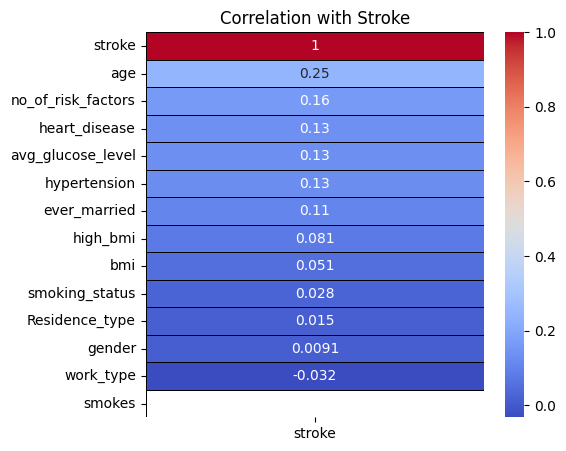

In [120]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,5))

plt.subplot(1,2,1)
corr = X_atributos.corrwith(X_atributos['stroke']).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sns.heatmap(corr,annot = True, cmap='coolwarm',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation with Stroke');

### **Feature Selection for Categorical Features**

**Mutual Information Test**

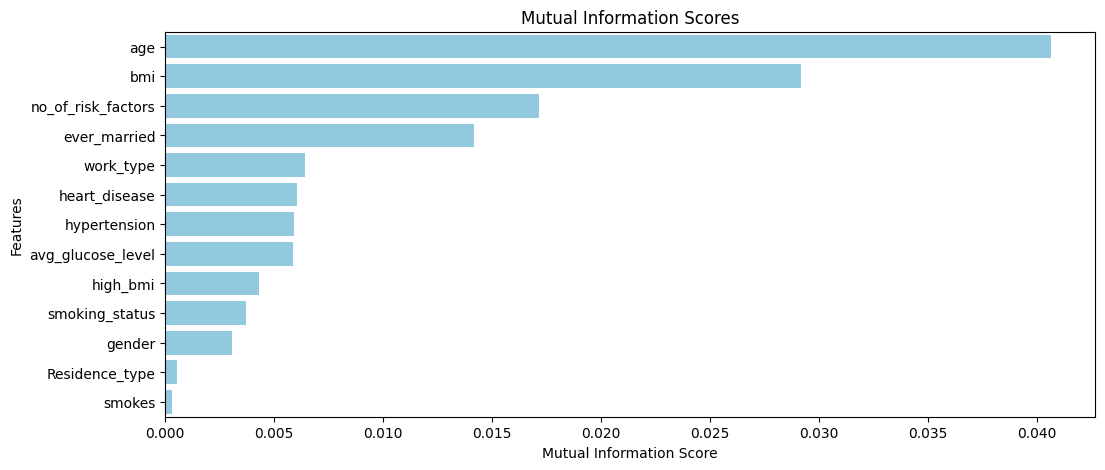

In [121]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif



selected_columns = X_atributos.drop('stroke', axis=1)
target = pd.DataFrame(X_atributos["stroke"])

best_features = SelectKBest(score_func=mutual_info_classif, k='all')
fit = best_features.fit(selected_columns, target)

feature_scores = fit.scores_

feature_scores_df = pd.DataFrame({'Features': selected_columns.columns, 'Mutual Information Score': feature_scores})

feature_scores_df = feature_scores_df.sort_values(by='Mutual Information Score', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x='Mutual Information Score', y='Features', data=feature_scores_df, color='skyblue')
plt.title('Mutual Information Scores')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.show()


According to the above scores, none of the features should be selected for modeling.

**Chi Squared Test**

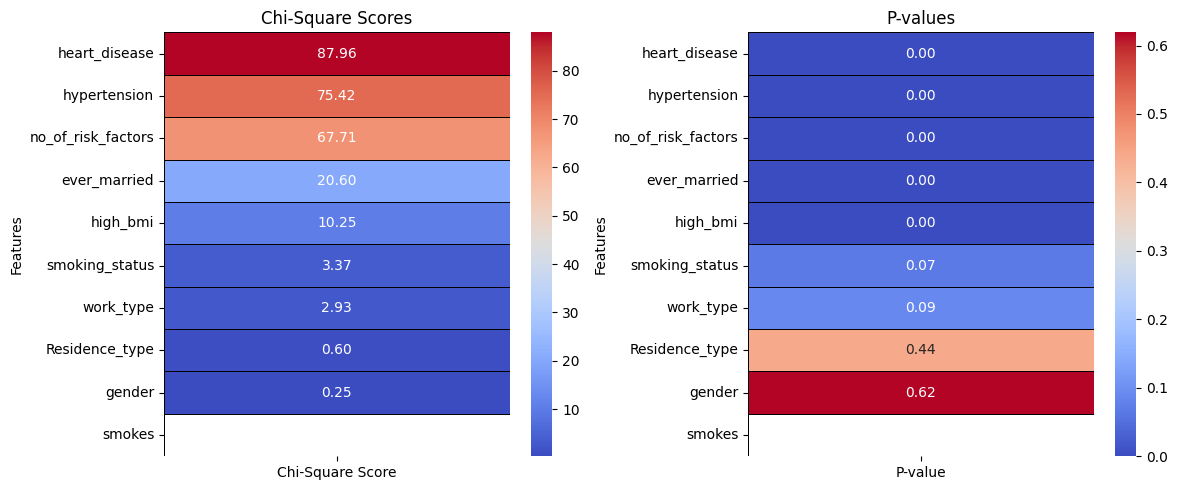

In [122]:
from sklearn.feature_selection import SelectKBest, chi2

features = X_atributos.loc[:, categorical_features].drop("stroke", axis=1)
target = pd.DataFrame(X_atributos["stroke"])


best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)


feature_scores = fit.scores_
p_values = fit.pvalues_

feature_scores_df = pd.DataFrame({'Features': list(features.columns), 'Chi-Square Score': feature_scores, 'P-value': p_values})


feature_scores_df = feature_scores_df.sort_values(by='Chi-Square Score', ascending=False)


feature_scores_df.set_index('Features', inplace=True)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.heatmap(feature_scores_df[['Chi-Square Score']].sort_values(by='Chi-Square Score', ascending=False), annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Chi-Square Scores')
plt.ylabel('Features')


plt.subplot(1, 2, 2)
sns.heatmap(feature_scores_df[['P-value']].sort_values(by='P-value'), annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('P-values')
plt.ylabel('Features')

plt.tight_layout()
plt.show()


P-value obtained from the Chi-Square test is below significance level (0.05) for heart_disease, hypertension, no_of_risk_factors, high_bmi and ever_married. It suggests that there is a significant association between the feature and the target variable.

**ANOVA Test**

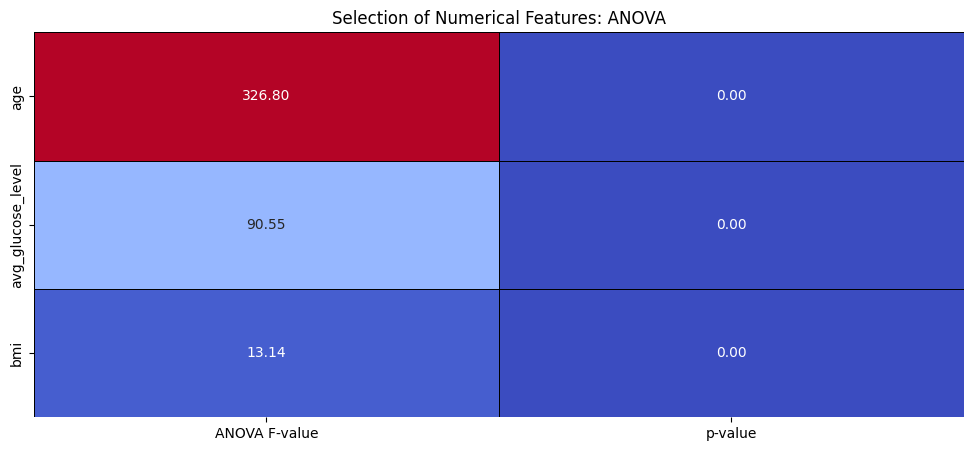

In [123]:
from sklearn.feature_selection import SelectKBest, f_classif

features = X_atributos.loc[:, discrete_features]
target = pd.DataFrame(X_atributos["stroke"])

encoded_feature_names = features.columns

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)


feature_scores = fit.scores_
p_values = fit.pvalues_
feature_scores_df = pd.DataFrame({'Features': encoded_feature_names, 'ANOVA F-value': feature_scores, 'p-value': p_values})

feature_scores_df = feature_scores_df.sort_values(by='ANOVA F-value', ascending=False)

plt.figure(figsize=(12, 5))
sns.heatmap(feature_scores_df[['ANOVA F-value', 'p-value']].sort_values(by='ANOVA F-value', ascending=False), annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', fmt='.2f', xticklabels=True, yticklabels=feature_scores_df['Features'], cbar=False)
plt.title('Selection of Numerical Features: ANOVA')
plt.show()


P-value obtained from the ANOVA test is below significance level (0.05) for three variables, it suggests that there are significant differences between the means of different categories.

According to the statistical tests, i will get rid of the columns 'gender', 'Residence_type', 'work_type', 'smoking_status', 'smokes'.

In [124]:
X_train_prepro['no_of_risk_factors']=X_train_prepro['no_of_risk_factors']-X_train_prepro['smokes']
X_test_prepro['no_of_risk_factors']=X_test_prepro['no_of_risk_factors']-X_test_prepro['smokes']

In [125]:
cols_to_drop=['gender', 'Residence_type', 'work_type', 'smoking_status', 'smokes']
X_train_prepro=X_train_prepro.drop(columns=cols_to_drop)
X_test_prepro=X_test_prepro.drop(columns=cols_to_drop)

In [126]:
num_attribs = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'no_of_risk_factors']
cat_attribs = ['ever_married']

X_train_oversampled, y_train_oversampled, X_test_preprocessed = preprocess_data(X_train_prepro, y_train_prepro, X_test_prepro, num_attribs, cat_attribs)


X_test= X_test_preprocessed
X_train = X_train_oversampled
y_train = y_train_oversampled

### **XGBoost best model after feature selection**

In [131]:
best_modelXG.fit(X_train, y_train)
y_train_pred = best_modelXG.predict(X_train)
y_test_pred = best_modelXG.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train)
precision_train = precision_score(y_train, y_train)
recall_train = recall_score(y_train, y_train)
f1_train = f1_score(y_train, y_train)

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

results_list = []

results_list.append({
    'Accuracy (Train)': accuracy_train,
    'Precision (Train)': precision_train,
    'Recall (Train)': recall_train,
    'F1 Score (Train)': f1_train,
    'Accuracy (Test)': accuracy_test,
    'Precision (Test)': precision_test,
    'Recall (Test)': recall_test,
    'F1 Score (Test)': f1_test,
    'Best F1 Score (Test)': best_f1,
})

resultadosXGFS = pd.DataFrame(results_list)
resultadosXGFS

,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test),Best F1 Score (Test)
0,1.00,1.00,1.00,1.00,0.90,0.23,0.44,0.30,0.30


### **Logistic Regression best model after feature selection**

In [133]:
best_modelLR.fit(X_train, y_train)
y_train_pred = best_modelLR.predict(X_train)
y_test_pred = best_modelLR.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train)
precision_train = precision_score(y_train, y_train)
recall_train = recall_score(y_train, y_train)
f1_train = f1_score(y_train, y_train)

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

results_list = []

results_list.append({
    'Accuracy (Train)': accuracy_train,
    'Precision (Train)': precision_train,
    'Recall (Train)': recall_train,
    'F1 Score (Train)': f1_train,
    'Accuracy (Test)': accuracy_test,
    'Precision (Test)': precision_test,
    'Recall (Test)': recall_test,
    'F1 Score (Test)': f1_test,
    'Best F1 Score (Test)': best_f1,
    'Best Threshold': best_threshold
})

resultadosXGFS = pd.DataFrame(results_list)
resultadosXGFS

,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test),Best F1 Score (Test),Best Threshold
0,1.00,1.00,1.00,1.00,0.90,0.23,0.44,0.30,0.30,0.68
